# Graduate Admissions
## EDA

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
grad = pd.read_csv('Admission_Predict_Ver1.1.csv')
grad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


---

## Project Description

The dataset used in the project uses information on graduate admission and the chance to get admitted from India.
It can be found at [Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions)

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are:
1) GRE Scores (out of 340) <br>
2) TOEFL Scores (out of 120) <br>
3) University Rating (out of 5) <br>
4) Statement of Purpose (out of 5) <br>
5) Letter of Recommendation Strength (out of 5) <br>
6) Undergraduate GPA (out of 10) <br>
7) Research Experience (either 0 or 1) <br>
8) Chance of Admit (ranging from 0 to 1) <br>

This project is splot into three parts:
1) Exploratory Data Anaylsis <br>
2) Data Cleaning: Scrubbing the Data <br>
3) Data Analysis/Mining: Modeling the Data <br>

This notebook is the first part: *EDA*

---

## Data Description

In [3]:
grad.shape

(500, 9)

There are 500 rows with 9 variables.

In [4]:
grad.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
grad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


All the features are either integers or floating number values. This makes sense since all the featurees are test scores or ratings. 

Let us explore each feature individually:

In [6]:
grad.describe(include='all')

# include='all' is added to include any categorical variables.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


The table above gives numerical descriptions (min, max, std, etc.) of each variable.

The Serial No. is not a consequential feature because a python dataframe has its own row numberings. I may choose to remove this while scrubbing the data.

The GRE scores in this dataset is interesting because there are no records of anyone receiving less than 290 points (minimum value). The average GRE score is around [150](https://www.prepscholar.com/gre/blog/average-gre-scores/). This may cause the results to be biased making it inapplicable for people in different regions that may have an average GRE score less than 317.

The TOEFL scores also show a similar trend where the average score is higher than the average score of [2019](https://crushthegretest.com/toefl-scoring/#:~:text=In%202019%2C%20a%20total%20score,needed%20at%20least%20a%20100.).

The origins of university ratings are ambiguous. I have completed this project under the assumption that the rating has been provided by the student/applicant themselves. Thus, this rating may be unreliable and inaccurate causing some bias in the resutlts.

SOP is an indicator of the Statement of Purpose and is a value between 1 and 5, inclusive.

Similarly, LOR is an indicator of the Letter of Recommendation and is a value between 1 and 5, inclusive.

CGPA is the value of the cumulative GPA of the applicants out of 10. The minimum value is approximately 7 which is higher than the mean of the range (5). This is another indicator that the dataset may only be applicable to applicants who graduated from a certain educational board or a specific region.

Research shows if the applicant has any research experience. A value of 0 indicates that the applicant does not have any research experience, while a value of 1 shows that they have had research experience.

Chance of Admit is a percentage provided by the applicant themselves, as stated by the [author](https://www.kaggle.com/mohansacharya/graduate-admissions/discussion/79063).

### Goal
<b>The goal of the project is to use machine learning model(s) to understand the importance it places on various features in deciding the chance to get admitted.<b>

---

## Duplicate & Missing Values

In [7]:
grad.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
grad.duplicated().value_counts()

False    500
dtype: int64

There are no NULL and duplicate values.

This is good because no "empty" values need to be replaced and there are no duplicate rows/observations.

---

## Feature Distribution

### GRE Score

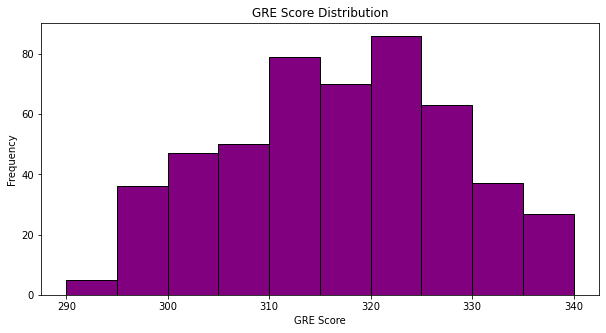

In [9]:
plt.figure(figsize = (10,5))
plt.hist(grad['GRE Score'], bins = 10, facecolor = 'purple', edgecolor = 'black')
plt.title('GRE Score Distribution')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')

plt.show()

This chart shows the information reflected by the statistical table above. HIgh GRE scores between 310 and 325 are the most common, which is higher than the average score.

The graph is bimodal, indicating two peaks.

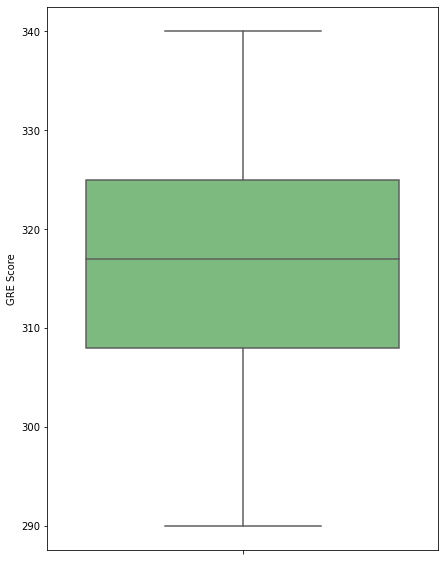

In [10]:
plt.figure(figsize = (7,10))

sb.boxplot(y = 'GRE Score', data = grad, palette = 'Greens')
plt.show()

### TOEFL Score

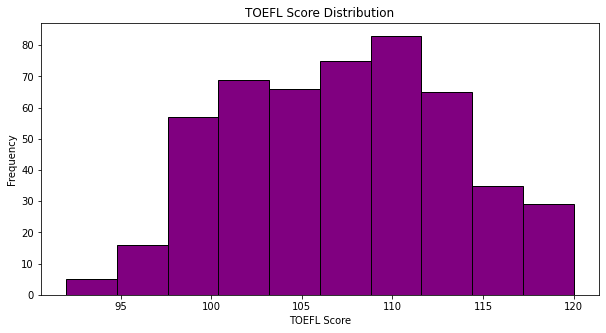

In [11]:
plt.figure(figsize = (10,5))
plt.hist(grad['TOEFL Score'], bins = 10, facecolor = 'purple', edgecolor = 'black')
plt.title('TOEFL Score Distribution')
plt.xlabel('TOEFL Score')
plt.ylabel('Frequency')

plt.show()

This histogram is left-skewed indicating that the frequency of low TOEFL scores is lower than higher TOEFL scores. THis might be indicative of the education level of the applicants recorded in this dataset. 

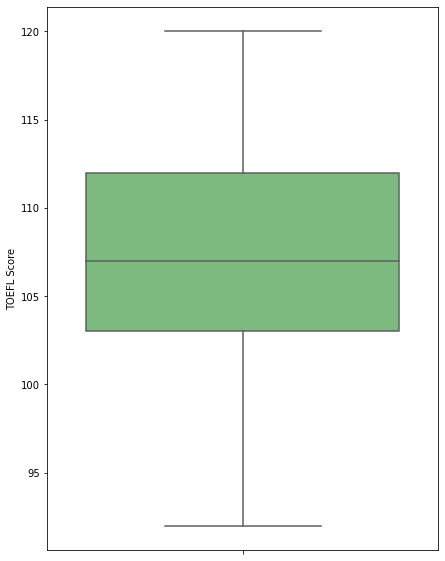

In [12]:
plt.figure(figsize = (7,10))

sb.boxplot(y = grad['TOEFL Score'], palette = 'Greens')
plt.show()

### University Rating

In [13]:
grad['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

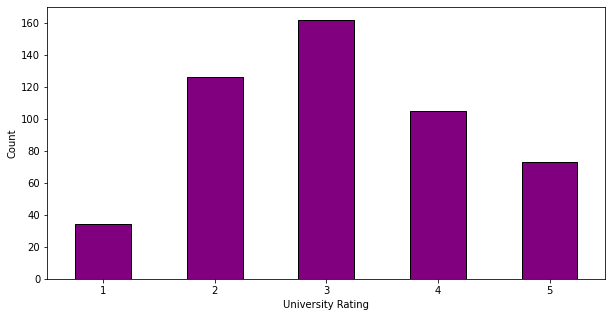

In [14]:
plt.figure(figsize = (10,5))
grad['University Rating'].value_counts().reindex([1, 2, 3, 4, 5]).plot(kind = 'bar',
                                                                       facecolor = 'purple',
                                                                       edgecolor = 'black')
plt.xticks(rotation = 0)
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

This is a bell-shaped curve indicating that most people rated universities the mean rating of 3 with fewer people giving extremely high or low ratings. 

This is intersting because it shows the nature of human cautiousness (since these ratings are provided by the applicants).

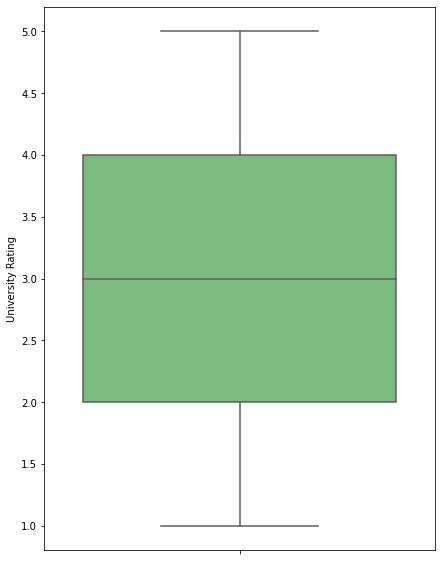

In [15]:
plt.figure(figsize = (7,10))

sb.boxplot(y = grad['University Rating'], palette = 'Greens')
plt.show()

### Statement of Purpose (SOP)

In [16]:
grad['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

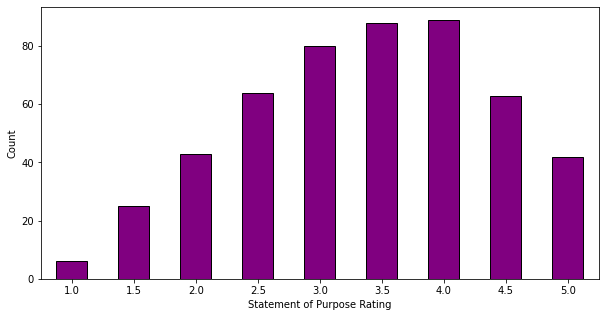

In [17]:
plt.figure(figsize = (10,5))
grad['SOP'].value_counts().reindex([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]).plot(kind = 'bar',
                                                                                       facecolor = 'purple',
                                                                                       edgecolor = 'black')
plt.xticks(rotation = 0)
plt.xlabel('Statement of Purpose Rating')
plt.ylabel('Count')
plt.show()

Fewer people have given low ratings for their statement of purpose. Most people have a realtively high rating between 3.5-4.0. 

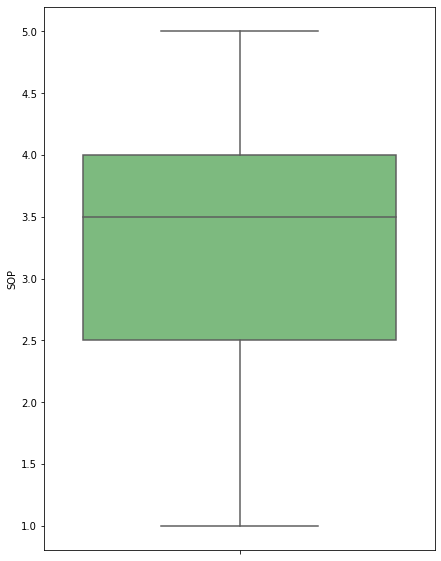

In [18]:
plt.figure(figsize = (7,10))

sb.boxplot(y = grad['SOP'], palette = 'Greens')
plt.show()

### Letter of Recommendation (LOR)

In [19]:
grad['LOR '].value_counts()

# NOTE: LOR has a space at the end of its name. Will be renamed in data scrubbing stage.

3.0    99
4.0    94
3.5    86
4.5    63
5.0    50
2.5    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64

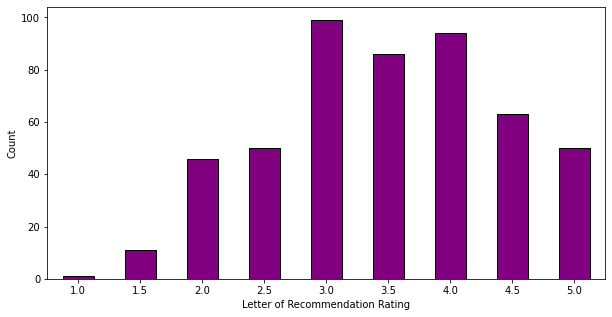

In [20]:
plt.figure(figsize = (10,5))
grad['LOR '].value_counts().reindex([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]).plot(kind = 'bar',
                                                                                       facecolor = 'purple',
                                                                                       edgecolor = 'black')
plt.xticks(rotation = 0)
plt.xlabel('Letter of Recommendation Rating')
plt.ylabel('Count')
plt.show()

This graph appears to be bimodal with two peaks at a rating of 3.0 and 4.0.

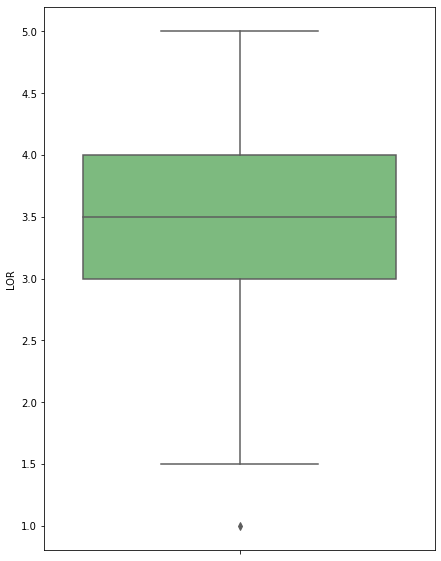

In [21]:
plt.figure(figsize = (7,10))

sb.boxplot(y = grad['LOR '], palette = 'Greens')
plt.show()

### Cumulative GPA (CGPA)

In [22]:
grad['CGPA'].value_counts()

8.00    9
8.76    9
8.54    7
8.45    7
8.56    7
       ..
8.72    1
7.23    1
7.87    1
9.67    1
7.57    1
Name: CGPA, Length: 184, dtype: int64

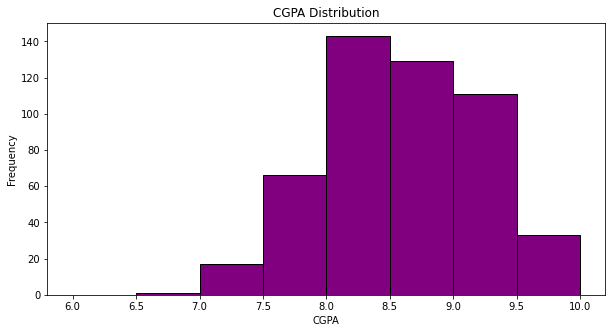

In [23]:
plt.figure(figsize = (10,5))

bin_order = [6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
plt.hist(grad['CGPA'], bins = bin_order, facecolor = 'purple', edgecolor = 'black')
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')

plt.show()

This distribution is slightly left-skewed indicating that most applicants have high CGPAs. In India, the average GPA is [7.0](https://gmatclub.com/forum/how-to-convert-indian-gpa-percentage-to-us-4-pt-gpa-scale-124249.html). This distribution shows that hte applicants in this dataset are above average.

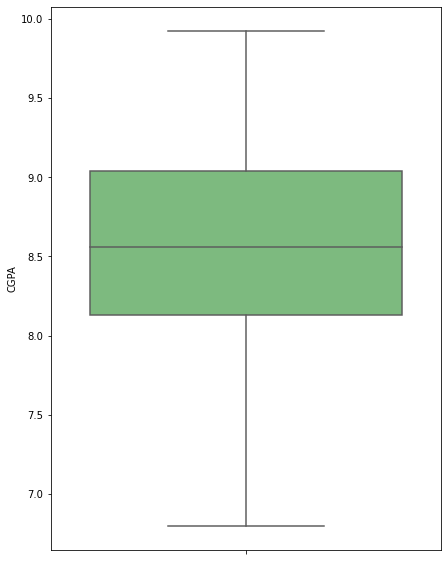

In [24]:
plt.figure(figsize = (7,10))

sb.boxplot(y = grad['CGPA'], palette = 'Greens')
plt.show()

### Research

In [25]:
grad['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

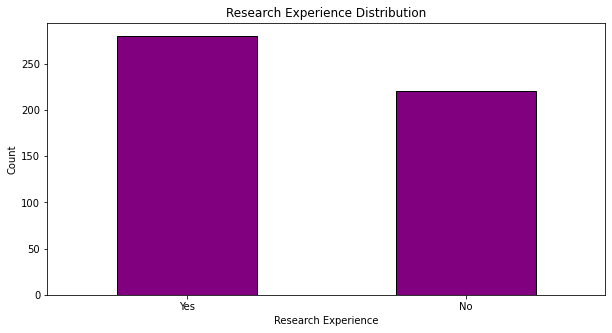

In [26]:
plt.figure(figsize = (10,5))

grad['Research'].value_counts().plot(kind = 'bar', facecolor = 'purple', edgecolor = 'black')
plt.xticks(rotation = 0)
plt.title('Research Experience Distribution')
plt.xlabel('Research Experience')
plt.ylabel('Count')

plt.xticks(np.arange(2), ['Yes', 'No'])

plt.show()

This distribution shows that most applicants have research experience prior to applying for the their graduate programs. 

This may not show the common trend on a global scale, and should be kept in mind if applying this model or dataset to represent a population larger than Indian students.

---

### Chance of Admit

In [27]:
grad['Chance of Admit '].value_counts()

# NOTE: The name of the feature has a space at the end => Will be removed while scrubbing the data. 

0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.34     2
0.50     2
0.43     1
0.37     1
0.39     1
Name: Chance of Admit , Length: 61, dtype: int64

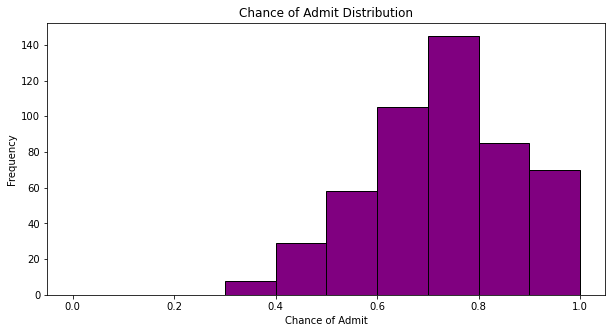

In [28]:
plt.figure(figsize = (10,5))

bin_order = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.hist(grad['Chance of Admit '], bins = bin_order, facecolor = 'purple', edgecolor = 'black')
plt.title('Chance of Admit Distribution')
plt.xlabel('Chance of Admit')
plt.ylabel('Frequency')

plt.show()

In [29]:
grad['Chance of Admit '].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit , dtype: float64

This distribution has an interesting shape where the the frequency of the chance of admit from 30% to 80% is increasing in a step-wise manner, after which it starts decreasing. Further, the mean value of this feature is 72%, implying that Indian students, on average, believe that they have a 72% chance of being admitted. 

This feature can be explored further by understanding the mentality and confidence of Indian students applying to graduate programs because after 80%, the chance of admit that these students gave themselves starts to decrease. 

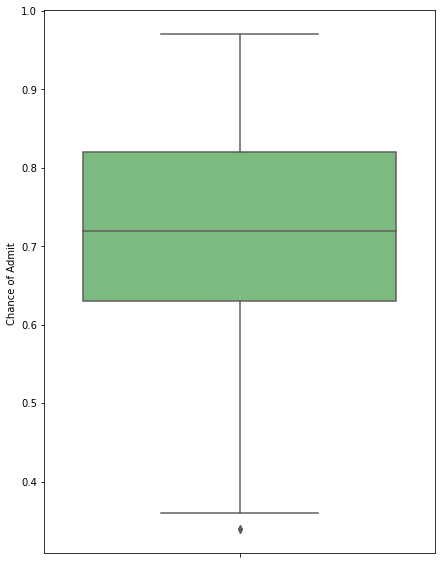

In [30]:
plt.figure(figsize = (7,10))

sb.boxplot(y = grad['Chance of Admit '], palette = 'Greens')
plt.show()

<b> None of the variables, except for Chance of Admit, have any outliers. The outlier in the Chance of Admit is clsoe to the minimum value and does not need to be dealt with. Hence, no outliers need to be dealt with. However, if there were any outliers, they could be removed or replaced or two models can be created - one with and one without outliers.</b>

### Pairplot

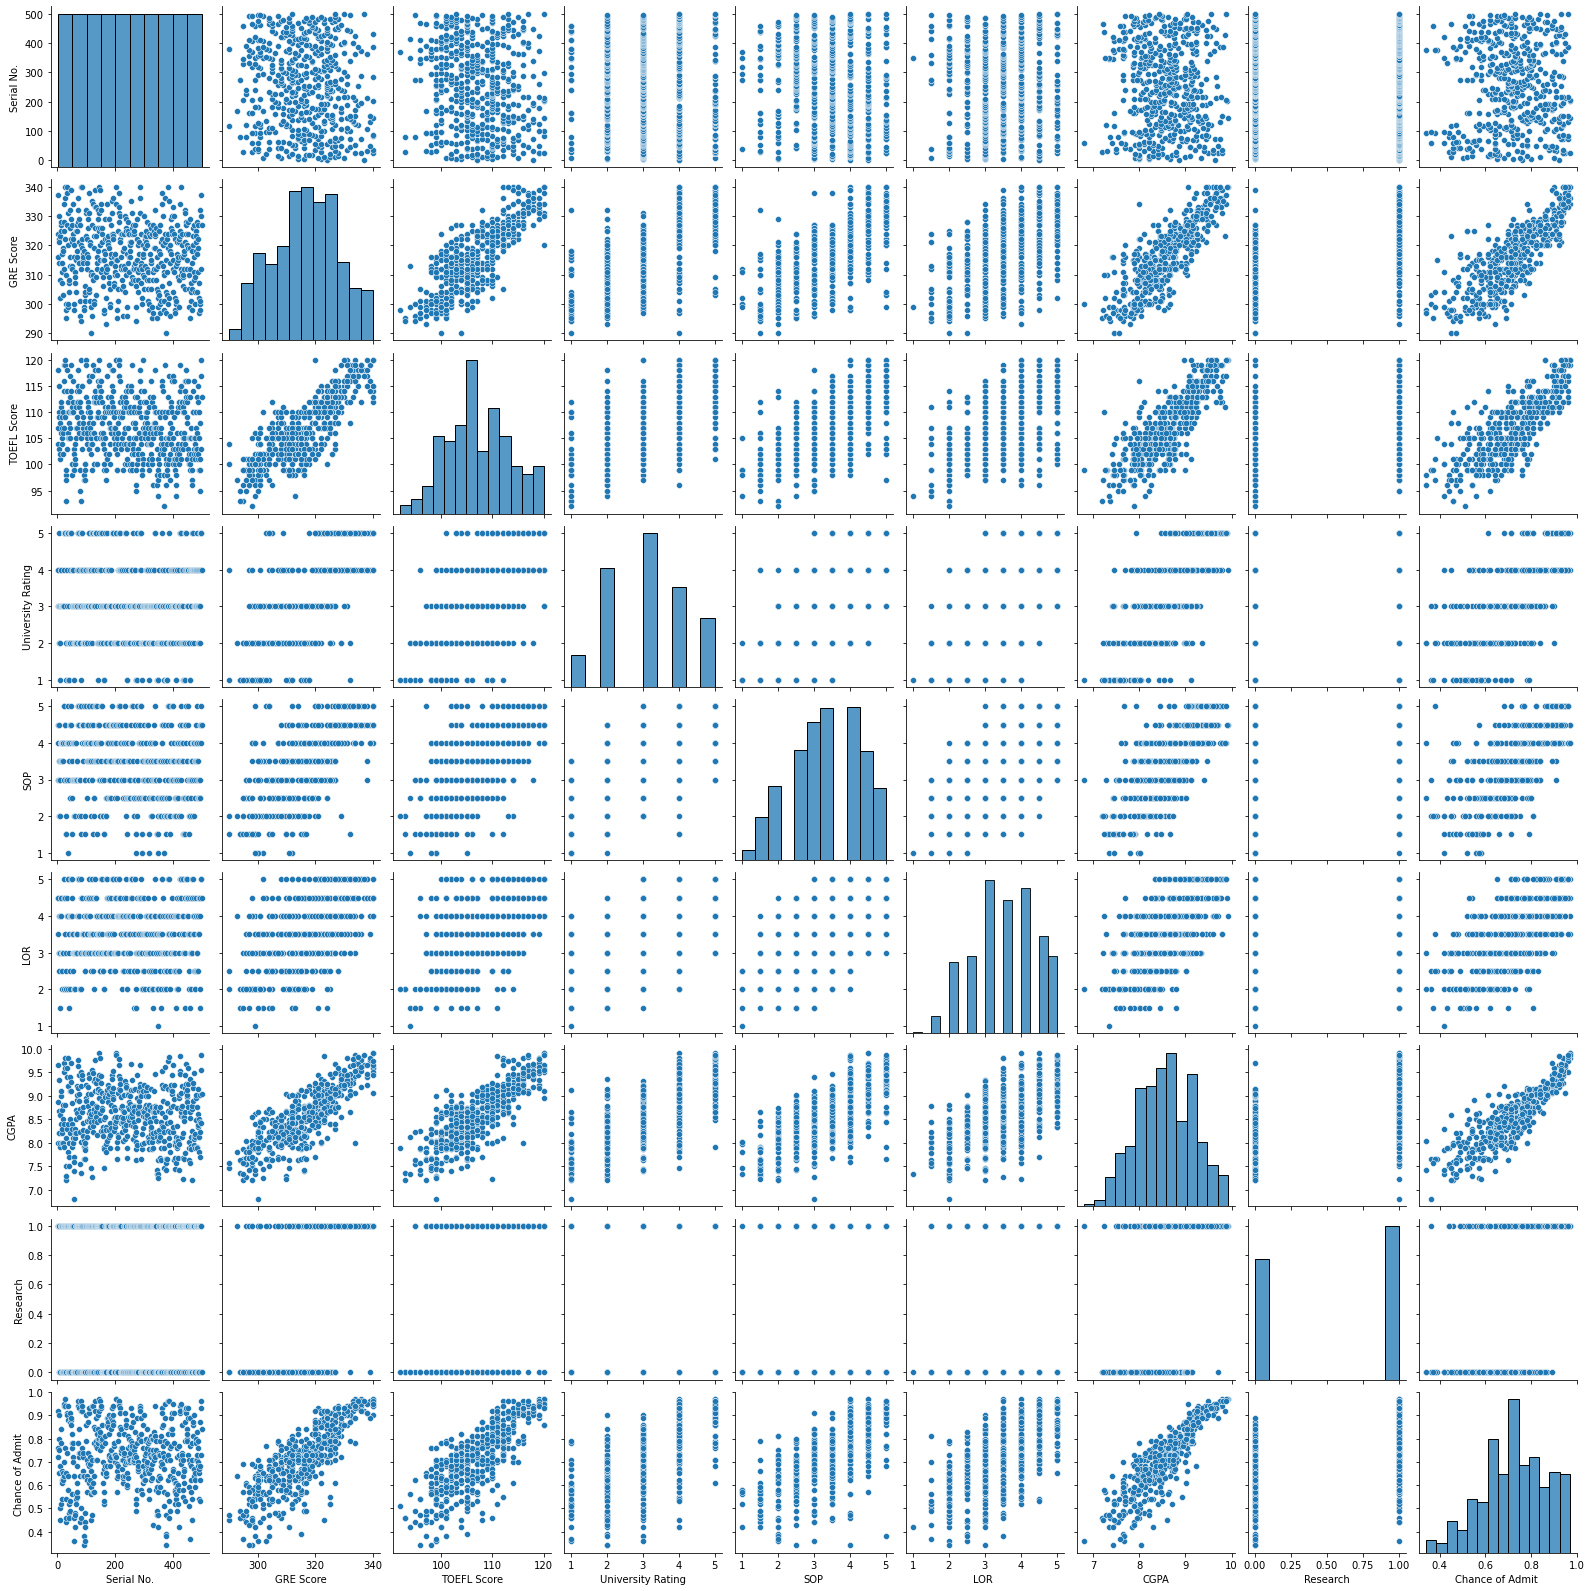

In [34]:
sb.pairplot(grad)

This pairplot helps in analyzing each of the variables in comparison with each other.



---

## Multicollinearity

### Collinearity

In [31]:
grad.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Let us look at a heatmap for a cleaer expression of the correlations between the variables.

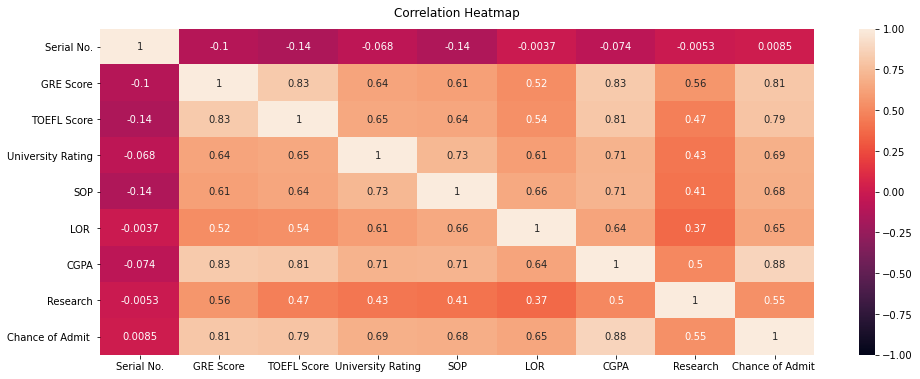

In [32]:
plt.figure(figsize=(16, 6))

heatmap = sb.heatmap(grad.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

By looking at the heatmap, the correlation values are easier to understand, i.e., extremely high or low values indicate a large or high degree of correlation.

It can be seen that all the variables have a relatively high degree of correlation (> 0.5 or < -0.5) with the chance of admit; mainly GRE score and TOEFL.

However, it can be seen that theree is a high degree of multicollinearity between the variables too. Especially between GRE, CGPA, and TOEFL scores.

Multicollinearity may result in a biased model. However, dealing with multicollinearity is not mandatory depending on the regression model. If a linear model is being applied, then multicollinearity would result in a biased model. However, when creating a decision tree or random forest regression, then dealing with multicollinearity is not mandatory.

If the goal is to simply predict the value of the chance of admit, then dealing with multicollinearity is not mandatory. However, trying to address the individual impacts of the features on the dependent variable would be wrong.

### VIF

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# the independent variables:
X = grad[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]

# VIF dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns

print(vif)

    VIF Factor           Features
0  1308.061089          GRE Score
1  1215.951898        TOEFL Score
2    20.933361  University Rating
3    35.265006                SOP
4    30.911476               LOR 
5   950.817985               CGPA
6     2.869493           Research


All the VIF values, except Research, is too high (> 10). 

During the stage of data scrubbing, I will standardize the numerical features which may improve the VIF factor.

---

# Let us move on to Data Scrubbing now (Pt. 2 Data Scrubbing)